In [87]:
all_results.loc[(all_results.subject=='089') & (all_results.software=='lcmodel')].Glu

440     0.196
441     0.199
442     0.196
443     0.196
444     0.196
2360    0.193
2361    0.196
2362    0.194
2363    0.196
2364    0.194
4280    0.193
4281    0.196
4282    0.192
4283    0.195
4284    0.195
4920    0.193
4921    0.194
4922    0.192
4923    0.193
4924    0.195
5560    0.195
5561    0.196
5562    0.194
5563    0.195
5564    0.197
7480    0.194
7481    0.199
7482    0.194
7483    0.196
7484    0.194
Name: Glu, dtype: float64

In [2]:
from pathlib import Path
import pandas as pd
results_1d = Path('results_1d')

def process_single_df(df):
    model_sub_split = df.path.str.split('/', expand=True).iloc[:, [1, 2]].rename(columns={1:'model', 2:'subject'})
    software_model_field_split = model_sub_split.model.str.split('_', expand=True).iloc[:, :3].rename(columns={0:'software', 1:'model', 2:'field'})
    field_basis_split = software_model_field_split.field.str.split('-', expand=True, n=1)
    if field_basis_split.shape[1] == 1:
        field_basis_split.loc[:, 'preproc'] = ''
        field_basis_split = field_basis_split.rename(columns={0:'field',})
    else:
        field_basis_split = field_basis_split.rename(columns={0:'field', 1:'preproc'})
    software_model_field_split['field'] = field_basis_split['field']
    software_model_field_split["model"] += "_" +  field_basis_split['preproc']

    return pd.concat((model_sub_split.subject, software_model_field_split, df.drop(columns='path')), axis=1)

all_results = []
for fp in results_1d.rglob('fit_res_group_unscaled_conc.csv'):
    if '05-blocks' not in fp.parent.stem:
        continue
    print(fp)
    all_results.append(
        process_single_df(
            pd.read_csv(fp)))

all_results = pd.concat(all_results).reset_index(drop=True)

results_1d/lcmodel_dyn-basis_3T_05-blocks/fit_res_group_unscaled_conc.csv
results_1d/abfit-reg_static-basis_7T-preproc-lb_05-blocks/fit_res_group_unscaled_conc.csv
results_1d/abfit-reg_static-basis_3T_05-blocks/fit_res_group_unscaled_conc.csv
results_1d/lcmodel_static-basis_3T-preproc-lb_05-blocks/fit_res_group_unscaled_conc.csv
results_1d/abfit-reg_static-basis_3T-preproc-lb_05-blocks/fit_res_group_unscaled_conc.csv
results_1d/abfit-reg_dyn-basis_3T_05-blocks/fit_res_group_unscaled_conc.csv
results_1d/lcmodel_static-basis_7T_05-blocks/fit_res_group_unscaled_conc.csv
results_1d/lcmodel_static-basis_7T-preproc-lb_05-blocks/fit_res_group_unscaled_conc.csv
results_1d/lcmodel_dyn-basis_7T_05-blocks/fit_res_group_unscaled_conc.csv
results_1d/abfit-reg_static-basis_7T_05-blocks/fit_res_group_unscaled_conc.csv
results_1d/abfit-reg_dyn-basis_7T_05-blocks/fit_res_group_unscaled_conc.csv
results_1d/lcmodel_static-basis_3T_05-blocks/fit_res_group_unscaled_conc.csv


In [3]:
columns_to_keep = [
    'subject',
 'software',
 'model',
 'field',
 'Dynamic',
 'X.CrCH2',
 'Ala',
 'Asp',
 'Cr',
 'GABA',
 'Glc',
 'Gln',
 'GSH',
 'Glu',
 'GPC',
 'Ins',
 'Lac',
 'Lip09',
 'Lip13a',
 'Lip13b',
 'Lip20',
 'MM09',
 'MM12',
 'MM14',
 'MM17',
 'MM20',
 'NAA',
 'NAAG',
 'PCh',
 'PCr',
 'sIns',
 'Tau',
 'PEth',
 'Asc',
 'Gly',
 'X.CrCH2.sd',
 'Ala.sd',
 'Asp.sd',
 'Cr.sd',
 'GABA.sd',
 'Glc.sd',
 'Gln.sd',
 'GSH.sd',
 'Glu.sd',
 'GPC.sd',
 'Ins.sd',
 'Lac.sd',
 'Lip09.sd',
 'Lip13a.sd',
 'Lip13b.sd',
 'Lip20.sd',
 'MM09.sd',
 'MM12.sd',
 'MM14.sd',
 'MM17.sd',
 'MM20.sd',
 'NAA.sd',
 'NAAG.sd',
 'PCh.sd',
 'PCr.sd',
 'sIns.sd',
 'Tau.sd',
 'PEth.sd',
 'Asc.sd',
 'Gly.sd'
]
all_results = all_results.loc[:, columns_to_keep]

# df

In [4]:
metabolites = ['Ala',
 'Asp',
 'Cr',
 'GABA',
 'Glc',
 'Gln',
 'GSH',
 'Glu',
 'GPC',
 'Ins',
 'Lac',
 'Lip09',
 'Lip13a',
 'Lip13b',
 'Lip20',
 'MM09',
 'MM12',
 'MM14',
 'MM17',
 'MM20',
 'NAA',
 'NAAG',
 'PCh',
 'PCr',
 'sIns',
 'Tau',
 'PEth',
 'Asc',
 'Gly']

In [8]:
import numpy as np
design_mat = np.zeros((5, 3))
design_mat[1, 0] = 1
design_mat[3, 1] = 1
design_mat[:, 2] = 1
print(design_mat)

def fit_design(x):
    coeffs, residuals, _, _ = np.linalg.lstsq(design_mat, x)

    # Standard error calculation
    M = len(x)
    N = len(coeffs)
    # Calculate covariance matrix
    cov = (residuals[0] / (M - N)) * np.linalg.inv(design_mat.T @ design_mat)
    # Standard deviation of parameters
    sigma = np.sqrt(np.diag(cov))
    return coeffs, sigma, cov

[[0. 0. 1.]
 [1. 0. 1.]
 [0. 0. 1.]
 [0. 1. 1.]
 [0. 0. 1.]]


('lcmodel', 'dyn-basis_', '3T')
0    0.269
1    0.272
2    0.270
3    0.269
4    0.270
Name: NAA, dtype: float64


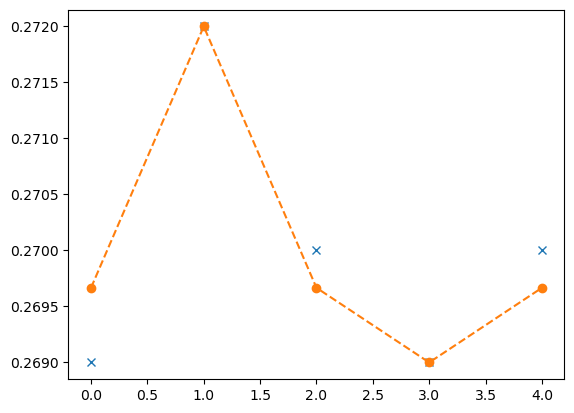

[ 0.00233333 -0.00066667  0.26966667]
[0.00066667 0.00066667 0.00033333]
[[ 4.44444444e-07  1.11111111e-07 -1.11111111e-07]
 [ 1.11111111e-07  4.44444444e-07 -1.11111111e-07]
 [-1.11111111e-07 -1.11111111e-07  1.11111111e-07]]


In [10]:
import itertools
import matplotlib.pyplot as plt

conditions = ['software', 'model', 'field']
all_combinations = list(itertools.product(*[all_results.loc[:, cond].unique() for cond in conditions]))

for comb in all_combinations:
    print(comb)
    selected = all_results[
        (all_results["software"] == comb[0]) &
        (all_results["model"] == comb[1]) &
        (all_results["field"] == comb[2]) &
        (all_results["subject"] == "001")].NAA
    print(selected)
    break

sel_coefs, socef_sd, coef_cov = fit_design(selected)

plt.plot(selected.values,'x')
plt.plot(sel_coefs @ design_mat.T,'o--')
plt.show()

print(sel_coefs)
print(socef_sd)
print(coef_cov)

In [16]:
# Make a df for a dummy mapped parameters file (used to identify metabolites)
mp_df = pd.DataFrame(
    np.zeros((len(metabolites), 2)),
    index=[f'conc_{met}' for met in metabolites],
    columns=pd.MultiIndex.from_tuples(((0,'mean'), (0, 'std'))))
mp_df

0     
            mean  std
conc_Ala     0.0  0.0
conc_Asp     0.0  0.0
conc_Cr      0.0  0.0
conc_GABA    0.0  0.0
conc_Glc     0.0  0.0
conc_Gln     0.0  0.0
conc_GSH     0.0  0.0
conc_Glu     0.0  0.0
conc_GPC     0.0  0.0
conc_Ins     0.0  0.0
conc_Lac     0.0  0.0
conc_Lip09   0.0  0.0
conc_Lip13a  0.0  0.0
conc_Lip13b  0.0  0.0
conc_Lip20   0.0  0.0
conc_MM09    0.0  0.0
conc_MM12    0.0  0.0
conc_MM14    0.0  0.0
conc_MM17    0.0  0.0
conc_MM20    0.0  0.0
conc_NAA     0.0  0.0
conc_NAAG    0.0  0.0
conc_PCh     0.0  0.0
conc_PCr     0.0  0.0
conc_sIns    0.0  0.0
conc_Tau     0.0  0.0
conc_PEth    0.0  0.0
conc_Asc     0.0  0.0
conc_Gly     0.0  0.0

In [17]:
# first_level_fits
#     {field}
#         {lb_model}
#             {subject}
from pathlib import Path
from scipy.linalg import block_diag

base_path = Path('first_level_1D')

for comb in all_combinations:
    print(f'Combination: {comb}')
    curr_base = base_path / comb[0] / comb[2] / comb[1]
    curr_base.mkdir(exist_ok=True, parents=True)
    for sub in [f'{x:03g}' for x in range(1, 129)]:
        print(f'Processing {sub}', end='\r')
        sub_df = pd.DataFrame()
        vars_vec = []
        for metab in metabolites:
            selected = all_results[
                (all_results["software"] == comb[0]) &
                (all_results["model"] == comb[1]) &
                (all_results["field"] == comb[2]) &
                (all_results["subject"] == sub)].loc[:, metab]
            coefs, _, coefs_cov = fit_design(selected)
            columns = [f'conc_{metab}_STIM0', f'conc_{metab}_STIM1', f'conc_{metab}_constant']
            sub_df.loc[0, columns] = coefs
            vars_vec.append(coefs_cov)
        sub_df.index.name = 'samples'
        
        sub_cov = pd.DataFrame(
            block_diag(*vars_vec),
            columns=sub_df.columns,
            index=sub_df.columns)
        
        # Saving
        sub_path = curr_base / f'sub-{sub}'
        sub_path.mkdir(exist_ok=True, parents=True)
        sub_cov.to_csv(sub_path / 'dyn_cov.csv')
        sub_df.to_csv(sub_path / 'dyn_results.csv')
        mp_df.to_csv(sub_path / 'mapped_parameters.csv')



Combination: ('lcmodel', 'dyn-basis_', '3T')
Combination: ('lcmodel', 'dyn-basis_', '7T')
Combination: ('lcmodel', 'static-basis_preproc-lb', '3T')
Combination: ('lcmodel', 'static-basis_preproc-lb', '7T')
Combination: ('lcmodel', 'static-basis_', '3T')
Combination: ('lcmodel', 'static-basis_', '7T')
Combination: ('abfit-reg', 'dyn-basis_', '3T')
Combination: ('abfit-reg', 'dyn-basis_', '7T')
Combination: ('abfit-reg', 'static-basis_preproc-lb', '3T')
Combination: ('abfit-reg', 'static-basis_preproc-lb', '7T')
Combination: ('abfit-reg', 'static-basis_', '3T')
Combination: ('abfit-reg', 'static-basis_', '7T')


In [18]:
for comb in all_combinations:
    print(f'{comb[2]}_{comb[1].rstrip('_').replace('_', '-')}_{comb[0]}')

3T_dyn-basis_lcmodel
7T_dyn-basis_lcmodel
3T_static-basis-preproc-lb_lcmodel
7T_static-basis-preproc-lb_lcmodel
3T_static-basis_lcmodel
7T_static-basis_lcmodel
3T_dyn-basis_abfit-reg
7T_dyn-basis_abfit-reg
3T_static-basis-preproc-lb_abfit-reg
7T_static-basis-preproc-lb_abfit-reg
3T_static-basis_abfit-reg
7T_static-basis_abfit-reg


### Test various ways of calculating variance

In [74]:
comb= all_combinations[0]
print(f'Combination: {comb}')
curr_base = Path('group_results_1D') / f'{comb[2]}_{comb[1].rstrip('_').replace('_', '-')}_{comb[0]}'
fitted_contrast_df = []
fitted_contrast_cov = []
subject_id = []
for fp in curr_base.rglob('dyn_results.csv'):
    fitted_contrast_df.append(pd.read_csv(fp, index_col=0))
    fitted_contrast_cov.append(
        pd.read_csv(fp.parent / 'dyn_cov.csv', index_col=0).loc['conc_Glu_STIM0', 'conc_Glu_STIM0'])
    subject_id.append(fp.parent.stem)
fitted_contrast_cov = np.asarray(fitted_contrast_cov)

fitted_contrast_df = pd.concat(fitted_contrast_df, axis=0).reset_index(drop=True)

example_const_values = fitted_contrast_df.mean().loc[[
    'conc_NAA_constant',
    'conc_NAA_constant',
    'conc_NAA_constant',
    'conc_Glu_constant',
    'conc_Glu_constant',
    'conc_Glu_constant',
]]
fitted_contrast_df.std().loc[[
    'conc_NAA_mean_activation',
    'conc_NAA_STIM1',
    'conc_NAA_STIM0',
    'conc_Glu_mean_activation',
    'conc_Glu_STIM1',
    'conc_Glu_STIM0']].div(example_const_values.to_numpy()) * 100

Combination: ('lcmodel', 'dyn-basis_', '3T')


conc_NAA_mean_activation    0.554774
conc_NAA_STIM1              0.724330
conc_NAA_STIM0              0.710146
conc_Glu_mean_activation    1.084997
conc_Glu_STIM1              1.396668
conc_Glu_STIM0              1.344628
dtype: float64

In [77]:
subject_id[np.argmin(fitted_contrast_cov)]

'88_sub-089'

In [80]:

print(comb)
selected = all_results[
    (all_results["software"] == comb[0]) &
    (all_results["model"] == comb[1]) &
    (all_results["field"] == comb[2]) &
    (all_results["subject"] == "089")].Glu
print(selected)

sel_coefs, socef_sd, coef_cov = fit_design(selected)
print(sel_coefs)
print(coef_cov)


('lcmodel', 'dyn-basis_', '3T')
440    0.196
441    0.199
442    0.196
443    0.196
444    0.196
Name: Glu, dtype: float64
[0.003 0.    0.196]
[[ 6.46623765e-35  1.61655941e-35 -1.61655941e-35]
 [ 1.61655941e-35  6.46623765e-35 -1.61655941e-35]
 [-1.61655941e-35 -1.61655941e-35  1.61655941e-35]]


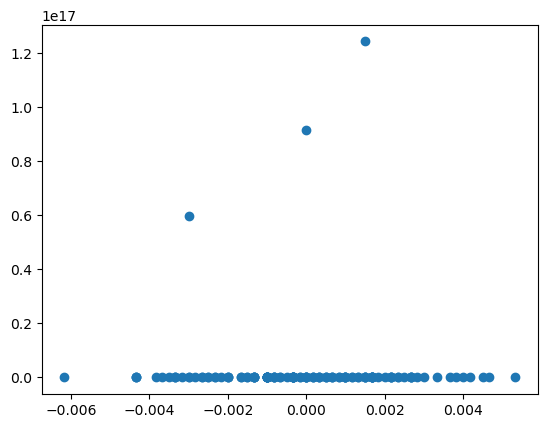

In [71]:
plt.scatter(fitted_contrast_df.loc[:, 'conc_Glu_mean_activation'], 1 / np.sqrt(fitted_contrast_cov))


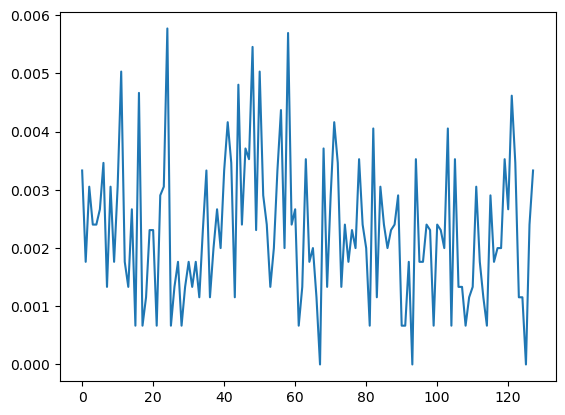

In [72]:
plt.plot( np.sqrt(fitted_contrast_cov))

In [31]:
print(comb)
selected_baseline = all_results[
                (all_results["software"] == comb[0]) &
                (all_results["model"] == comb[1]) &
                (all_results["field"] == comb[2]) &
                (all_results["Dynamic"].isin([1,3,5]))]
print('Mean of baseline')
print(selected_baseline.loc[:,[ 'Glu', 'NAA', 'Tau']].mean())
print('Std of baseline')
print(selected_baseline.loc[:,[ 'Glu', 'NAA', 'Tau']].std())

selected_stim = all_results[
                (all_results["software"] == comb[0]) &
                (all_results["model"] == comb[1]) &
                (all_results["field"] == comb[2]) &
                (all_results["Dynamic"].isin([2, 4]))]

print('Mean of stim conditions')
print(selected_stim.loc[:,[ 'Glu', 'NAA', 'Tau']].mean())
print('Std of stim conditions')
print(selected_stim.loc[:,[ 'Glu', 'NAA', 'Tau']].std())


('lcmodel', 'static-basis_', '3T')
Mean of baseline
Glu    0.195091
NAA    0.269169
Tau    0.028907
dtype: float64
Std of baseline
Glu    0.002325
NAA    0.001802
Tau    0.001833
dtype: float64
Mean of stim conditions
Glu    0.197039
NAA    0.271328
Tau    0.029403
dtype: float64
Std of stim conditions
Glu    0.002289
NAA    0.001718
Tau    0.001877
dtype: float64


In [35]:
from subprocess import run
fl_contrasts = base_path.parent / 'dyn_second_level/fl_contrasts.json'
contrasts = base_path.parent / 'dyn_second_level/design.con'
ftests = base_path.parent / 'dyn_second_level/design.fts'

output_base = Path('group_results_1D2')
output_base.mkdir(exist_ok=True)


for comb in all_combinations:
    curr_base = base_path / comb[0] / comb[2] / comb[1]
    dirs_as_list = [str(curr_base / f'sub-{x:03g}') for x in range(1, 129)]
    output = output_base / f'{comb[2]}_{comb[1].rstrip('_').replace('_', '-')}_{comb[0]}'
    cmd = [
        'fmrs_stats',
        '--data',]\
        + dirs_as_list\
        + ['--output', str(output),
        '--combine', 'NAA', 'NAAG',
        '--combine', 'Cr', 'PCr',
        '--combine', 'PCh', 'GPC',
        '--combine', 'Glu', 'Gln',
        '--fl-contrasts', str(fl_contrasts),
        '--hl-contrasts', str(contrasts),
        '--hl-ftests', str(ftests),
        '--overwrite']
    run(cmd, check=True)

[[1.]]
fe
{'f-stat': array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 4.5687439e+02,
        3.9820171e+01, 5.2159275e+06, 2.7211777e+03, 2.6398213e+03,
        1.2375381e+07, 4.5376701e+00, 7.2450775e+01, 2.7551509e+05,
        2.4535586e-01, 7.9942608e+00, 8.4981594e+04, 6.3825040e+00,
        5.1833081e-01, 1.5868421e+06, 7.6175964e+01, 3.5148884e+01,
        2.6052865e+06, 1.4775143e+28, 8.3619556e+26, 4.2424453e+33,
        1.1293594e+02, 2.7614918e+00, 1.9967020e+05, 1.0125373e+30,
        2.6072178e+28, 4.2371565e+33, 2.3620276e+00, 1.1791631e+00,
        1.9475341e+05, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0167058e+01, 5.2652637e+01, 1.3976780e+04, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 3.1868544e-01, 5.9776359e+00,
        4.2758027e+03, 9.1135540e+00, 2.2104513e+01, 2.8122758e+07,
        2.5605185e+02, 1.5895198e+02, 4.4115520e+06, 1.0473515e+02,
        8.8725349e+01, 3.7251725e+06, 5.3458285e+00, 7.6232147e+00,
        1.3758938e+07, 2.53

## Repeat 2D plotting code

In [41]:
import pandas as pd
from pathlib import Path
base_output = Path('group_results_1D2')

group_res = {}
group_f = {}

for fp in base_output.rglob('group_stats.csv'):
    print(fp)
    group_res[fp.parent.stem] = pd.read_csv(
        fp,
        index_col=0,
        header=[0])
    group_f[fp.parent.stem] = pd.read_csv(
        fp.parent / 'group_fstats.csv',
        index_col=0,
        header=[0])
    
combined_res = {key: pd.concat((group_res[key].loc[:, ['COPE', 'VARCOPE', 'z']] , group_f[key]), axis=1) for key in group_res}


def print_percentage_activations(df):
    mean_activation_df = df.filter(regex='STIM1', axis=0)
    mean_activation_df.index = mean_activation_df.index.str.replace('_STIM1','').str.replace('conc_','')
    mean_activation_df = mean_activation_df.drop(['NAA', 'NAAG', 'Cr', 'PCr', 'PCh', 'GPC'])
    mean_activation_df

    constant_df = df.filter(regex='constant', axis=0)
    constant_df.index = constant_df.index.str.replace('_constant','').str.replace('conc_','')
    constant_df = constant_df.drop(['NAA', 'NAAG', 'Cr', 'PCr', 'PCh', 'GPC'])
    constant_df.COPE

    mean_activation_df
    # constant_df
    mean_activation_df.loc[:, ['COPE', 'VARCOPE']] = mean_activation_df.loc[:, ['COPE', 'VARCOPE']].div(constant_df.COPE, axis=0)

    return mean_activation_df.style\
    .format(formatter={
        'COPE': "{:+0.1%}",
        'VARCOPE': "{:+0.2%}",
        'z': "{:+05.2f}",
        'p': "{:05.3f}"})\
    .highlight_between(subset=['p'],left=0, right=0.05, props='font-weight:bold;color:#e83e8c')


group_results_1D2/3T_static-basis-preproc-lb_abfit-reg/group_stats.csv
group_results_1D2/3T_dyn-basis_lcmodel/group_stats.csv
group_results_1D2/3T_static-basis_abfit-reg/group_stats.csv
group_results_1D2/7T_static-basis_abfit-reg/group_stats.csv
group_results_1D2/7T_static-basis-preproc-lb_lcmodel/group_stats.csv
group_results_1D2/7T_dyn-basis_lcmodel/group_stats.csv
group_results_1D2/7T_static-basis-preproc-lb_abfit-reg/group_stats.csv
group_results_1D2/7T_static-basis_lcmodel/group_stats.csv
group_results_1D2/3T_static-basis-preproc-lb_lcmodel/group_stats.csv
group_results_1D2/3T_dyn-basis_abfit-reg/group_stats.csv
group_results_1D2/3T_static-basis_lcmodel/group_stats.csv
group_results_1D2/7T_dyn-basis_abfit-reg/group_stats.csv


In [42]:
def print_percentage_activations_all(all_df):
    out = {}
    for key, df in all_df.items():
        mean_activation_df = df.filter(regex='STIM1', axis=0)
        mean_activation_df.index = mean_activation_df.index.str.replace('_STIM1','').str.replace('conc_','')
        mean_activation_df = mean_activation_df.drop(['NAA', 'NAAG', 'Cr', 'PCr', 'PCh', 'GPC'])
        mean_activation_df

        constant_df = df.filter(regex='constant', axis=0)
        constant_df.index = constant_df.index.str.replace('_constant','').str.replace('conc_','')
        constant_df = constant_df.drop(['NAA', 'NAAG', 'Cr', 'PCr', 'PCh', 'GPC'])
        constant_df.COPE

        mean_activation_df
        # constant_df
        mean_activation_df.loc[:, ['COPE', 'VARCOPE']] = mean_activation_df.loc[:, ['COPE', 'VARCOPE']].div(constant_df.COPE, axis=0)
        out[key] = mean_activation_df.loc[:, ['COPE', 'z', 'f-stat', 'zf-stat','p']]
    
    out = pd.concat(out.values(), axis=1, keys=out.keys())

    formatter_dict = {}
    p_list = []
    for key in all_df:
        formatter_dict.update({
            (key, 'COPE'): "{:+0.1%}",
            #(key, 'VARCOPE'): "{:+0.2%}",
            (key, 'z'): "{:+0.2f}",
            (key, 'f-stat'): "{:+0.2f}",
            (key, 'zf-stat'): "{:+0.2f}",
            (key, 'p'): "{:0.1e}"})
        p_list.append((key, 'p'))
    return out.style\
    .format(formatter=formatter_dict)\
    .highlight_between(subset=p_list,left=0, right=0.05, props='font-weight:bold;color:#e83e8c')

print_percentage_activations_all(combined_res)

In [43]:
to_drop = ['NAA', 'NAAG', 'Cr', 'PCr', 'PCh', 'GPC', 'Ala', 'Gly', 'Lip09', 'Lip13a', 'Lip13b', 'Lip20','MM09','MM20','MM12','MM14', 'MM17']

def calc_cohens_d(all_df):
    out = {}
    for key, df in all_df.items():
        mean_activation_df = df.filter(regex='STIM1', axis=0)
        mean_activation_df.index = mean_activation_df.index.str.replace('_STIM1','').str.replace('conc_','')
        mean_activation_df = mean_activation_df.drop(to_drop)
        
        # calculate SD from variance
        mean_activation_df.loc[:,'SDCOPE'] = mean_activation_df.VARCOPE.pow(0.5)

        # Calculate Cohens d
        mean_activation_df.loc[:,'Cohens_d'] = mean_activation_df.COPE.div(mean_activation_df.SDCOPE)

        constant_df = df.filter(regex='constant', axis=0)
        constant_df.index = constant_df.index.str.replace('_constant','').str.replace('conc_','')
        constant_df = constant_df.drop(to_drop)

        # Calculate percentages
        mean_activation_df.loc[:, ['COPE', 'VARCOPE', 'SDCOPE']] = mean_activation_df.loc[:, ['COPE', 'VARCOPE', 'SDCOPE']].div(constant_df.COPE, axis=0)
        out[key] = mean_activation_df.loc[:, ['COPE', 'SDCOPE', 'Cohens_d']]
    
    return pd.concat(out.values(), axis=1, keys=out.keys())

def print_cohensd_all(all_df):
    formatter_dict = {}
    for key in results_df.columns.get_level_values(0).unique():
        formatter_dict.update({
            (key, 'COPE'): "{:+0.1%}",
            (key, 'SDCOPE'): "{:0.5%}",
            (key, 'Cohens_d'): "{:0.3f}"})

    return all_df.sort_index().style\
        .format(formatter=formatter_dict)

results_df = calc_cohens_d(combined_res)
results_df.to_csv('cohensd_1d.csv')
print_cohensd_all(results_df)

In [27]:
to_plot_cd = results_df.loc[:,(slice(None), ['Cohens_d', 'COPE'])]
to_plot_cd = to_plot_cd.melt(ignore_index=False).reset_index(names=['Metabolite'])

#  Split into field strength and model
to_plot_cd[['Field', 'Model', 'software']] = to_plot_cd.variable_0.str.split('_', expand=True)
to_plot_cd = to_plot_cd.drop(['variable_0'], axis=1)
to_plot_cd = to_plot_cd.rename(columns = {'variable_1':'value_type'})

# Abs for Cohen's d and percentage for COPE
cd_index = to_plot_cd.value_type=="Cohens_d"
to_plot_cd.loc[cd_index, "value"] = to_plot_cd.loc[cd_index, "value"].abs()
to_plot_cd.loc[~cd_index, "value"] = to_plot_cd.loc[~cd_index, "value"] * 100.0
to_plot_cd

,Metabolite,value_type,value,Field,Model,software
0,Asp,Cohens_d,0.469040,3T,static-basis-preproc-lb,abfit-reg
1,GABA,Cohens_d,0.216768,3T,static-basis-preproc-lb,abfit-reg
2,Glc,Cohens_d,1.134033,3T,static-basis-preproc-lb,abfit-reg
3,Gln,Cohens_d,0.855879,3T,static-basis-preproc-lb,abfit-reg
4,GSH,Cohens_d,0.339048,3T,static-basis-preproc-lb,abfit-reg
...,...,...,...,...,...,...
379,Asc,COPE,0.331995,7T,dyn-basis,abfit-reg
380,NAA+NAAG,COPE,-0.104846,7T,dyn-basis,abfit-reg
381,Cr+PCr,COPE,-0.077313,7T,dyn-basis,abfit-reg
382,PCh+GPC,COPE,-0.181146,7T,dyn-basis,abfit-reg


In [28]:
to_plot_cd_with_size = to_plot_cd.copy()
to_plot_cd_with_size['importance'] = 1
important_mets = ['Glu', 'NAA+NAAG', 'Cr+PCr']
for met in important_mets:
    to_plot_cd_with_size.loc[to_plot_cd_with_size.Metabolite==met,'importance'] = 10

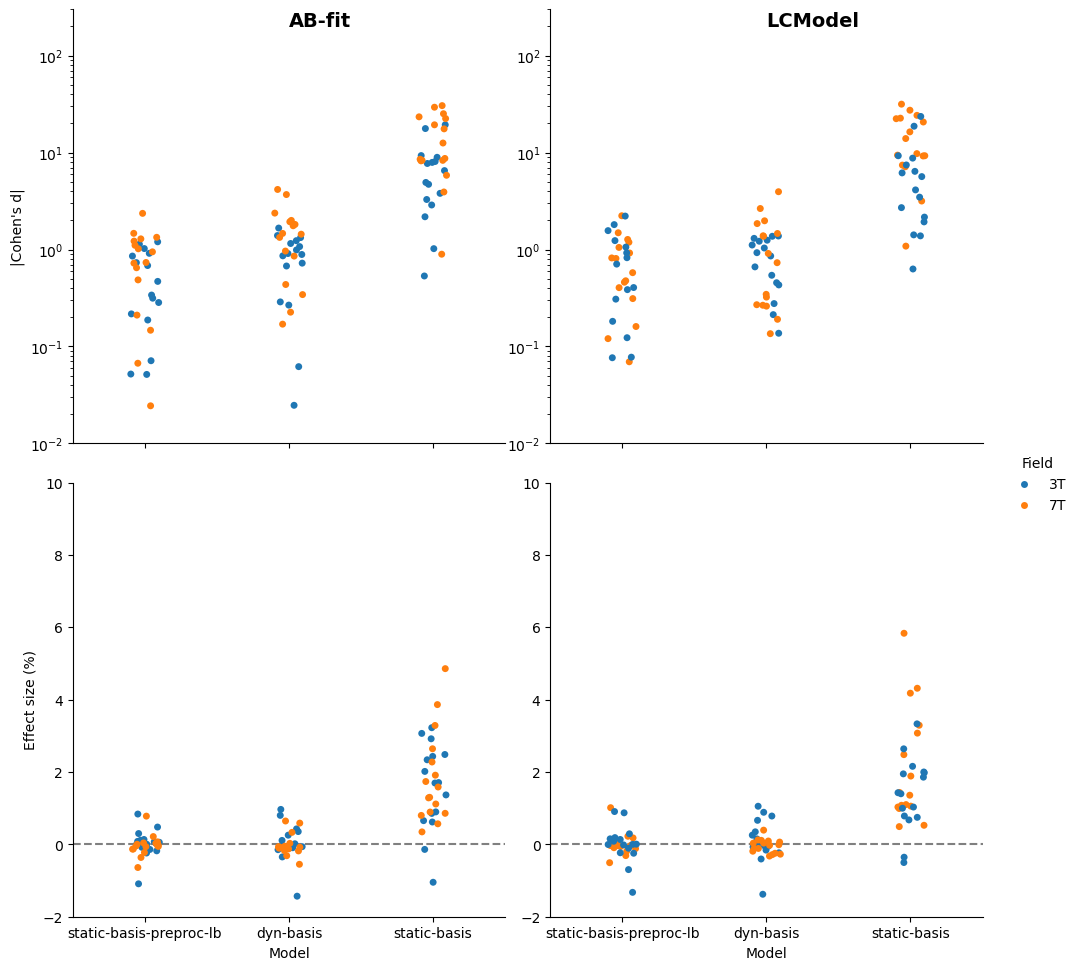

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt


effect_plot=sns.catplot(
    data=to_plot_cd,
    kind='strip',
    x='Model',
    hue='Field',
    y="value",
    log_scale=False,
    row="value_type",
    col='software',
    sharey=False
)

effect_plot.refline(y=0)
_ = effect_plot.axes.flat[0].set(yscale="log")
_ = effect_plot.axes.flat[1].set(yscale="log")
_ = effect_plot.axes.flat[0].set_ylim(10**-2, 3*10**2)
_ = effect_plot.axes.flat[1].set_ylim(10**-2, 3*10**2)

_ = effect_plot.axes.flat[0].set(ylabel="|Cohen's d|")
_ = effect_plot.axes.flat[2].set(ylabel="Effect size (%)")
_ = effect_plot.axes.flat[2].set_ylim(-2, 10)
_ = effect_plot.axes.flat[3].set_ylim(-2, 10)

for idx in range(4):
    _ = effect_plot.axes.flat[idx].set(title="")
_ = effect_plot.axes.flat[0].annotate("AB-fit", (1, 2*10**2), weight='bold', size=14)
_ = effect_plot.axes.flat[1].annotate("LCModel", (1, 2*10**2), weight='bold', size=14)


# effect_plot.savefig("figures/dynamic_effect_size.png", dpi=600, bbox_inches="tight") 